## Loading CSRNet checkpoint for apple counting and detection

Once you have completed training, this is what we use to check our model checkpoint.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from PIL import Image
from torchvision import transforms
from model import CSRNet  # defined in model.py

In [1]:
# Initialize the model
model = CSRNet()

# Load the checkpoint
checkpoint_path = '0model_best.pth.tar' # Once complete there are two checkpoint files
checkpoint = torch.load(checkpoint_path, map_location=torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

# Load the model state_dict from the checkpoint
model.load_state_dict(checkpoint['state_dict'])

# Set the model to evaluation mode
model.eval()

NameError: name 'CSRNet' is not defined

In [41]:
# Image to test with
#img_path = 'D:\\AI\\CSRNet\\CSRNet-pytorch\\dataset\\OIP.jpg'
img_path = r'D:\MASTERS\Year 2\Machine Vision\Assignment\KFuji\preprocessed data\images\BD12_sup_201711_069_01_RGBhr.jpg'
img = Image.open(img_path)

# Save the original image for display before any transformations
original_img_for_display = img.copy()

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Preprocess the image
img_tensor = transform(img).unsqueeze(0)  # Add batch dimension

In [42]:
with torch.no_grad():  # Disable gradient calculations
    density_map = model(img_tensor)

# Convert the output to a NumPy array for further processing
density_map = density_map.squeeze().cpu().numpy()

In [43]:
apple_count = density_map.sum()
print(f"Estimated number of apples: {apple_count}")

Estimated number of apples: 12.25220012664795


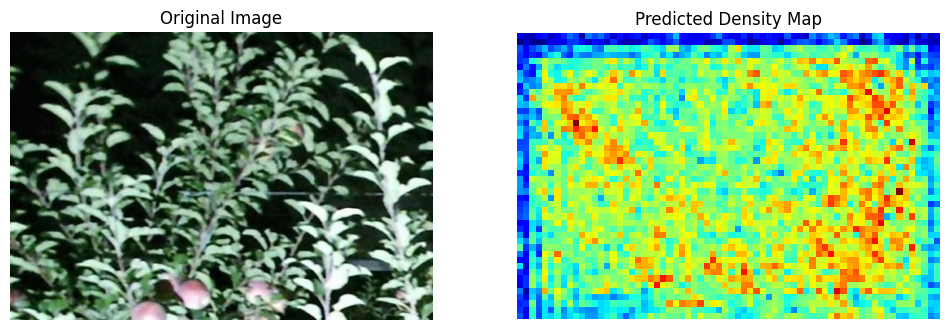

In [44]:
# Create a subplot to show both the image and density map side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Show the original image (without any preprocessing or tensor conversion)
axs[0].imshow(original_img_for_display)
axs[0].set_title("Original Image")
axs[0].axis('off')  # Hide axis for a cleaner look

# Show the density map
im = axs[1].imshow(density_map, cmap='jet')
axs[1].set_title("Predicted Density Map")
axs[1].axis('off')  # Hide axis for a cleaner look

# Display the figure
plt.show()